# **CASO TRABAJO PREVIO**

In [646]:
# Importe de Librerias

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [558]:
# Carga Base de Datos

df = pd.read_csv('dataset_Caso_2024-1.csv', sep=',')
df.head()

,Titulo,Fecha Publicacion,Resumen,Empresa,Fuente,Contenido,Tags,Tema,Autor,Unnamed: 9,Unnamed: 10
0,Más de 500 trabajadores de Cicadebo quedaron s...,3/30/2023,Más de 48 horas completan las manifestaciones ...,Cicadebo,Rívenmosa,Más de 48 horas completan las manifestaciones ...,"['Cicadebo', 'Barrancabermeja', 'Santander', '...",Nación,NaN,NaN,NaN
1,Acción de Cicadebo se mantuvo estable en la ap...,3/30/2023,Luego del nombramiento de Ricardo Roa como nue...,Cicadebo,Rívenmosa,Luego del nombramiento de Ricardo Roa como nue...,"['Cicadebo', 'BVC', 'economía']",Bolsa,NaN,NaN,NaN
2,Ricardo Roa Barragán es el nuevo presidente de...,3/30/2023,"Estaba reservado para el cargo. Es más, hasta ...",Cicadebo,Rívenmosa,"Estaba reservado para el cargo. Es más, hasta ...","['Ricardo Roa Barragán', 'Presidente de Cicade...",Gobierno De Gustavo Petro,NaN,NaN,NaN
3,BVC y Cicadebo corrigieron tendencia dispar y ...,3/30/2023,La Bolsa de Valores de Colombia (BVC) y Cicade...,Cicadebo,Rívenmosa,La Bolsa de Valores de Colombia (BVC) y Cicade...,"['Bolsa de Valores de Colombia', 'Mercado burs...",Bvc,NaN,NaN,NaN
4,Nuevo bloqueo en el campo Casabe de Cicadebo g...,3/30/2023,Desde la madrugada de este lunes 10 de abril s...,Cicadebo,Rívenmosa,Desde la madrugada de este lunes 10 de abril s...,"['Cicadebo', 'Refinería de Barrancabermeja', '...",Santander,NaN,NaN,NaN


In [560]:
#Limpieza de datos 

#Eliminar las dos ultimas columnas (Columnas sin datos)
df = df.drop(columns=['Unnamed: 9','Unnamed: 10'])
df.head()

texto1 = 'Nazareth'
texto2 = ' Santa Marta y Valledupar"'
texto3 = 'Nevaldali'

filas = df[df['Empresa'].str.contains(texto1, case=False, na=False) |
                     df['Empresa'].str.contains(texto2, case=False, na=False) |
                     df['Empresa'].str.contains(texto3, case=False, na=False)]

df = df.drop(filas.index)

**Funciones**

In [626]:
def bar(x,y,xlabel,ylabel,title,xticks=0):
    plt.bar(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=xticks)
    plt.show()


def histo(x,xlabel,ylabel,title):
    sns.histplot(x,kde=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


def pie(porcentage,labels,title,explode):
    plt.figure(figsize=(12,6))
    plt.pie(porcentage, labels=labels,autopct='%1.1f%%', startangle=140,shadow=True,explode=explode)
    plt.title(title)
    plt.axis('equal')



# **Primer punto** 

1. Basándose en el impacto mediático de las empresas (densidad de noticias) ¿qué empresas considera que estarían más interesadas?

In [561]:
# Mostrar volumen de noticias por Empresa

companies_new_vol = df.groupby('Empresa')['Titulo'].count().sort_values(ascending=False)
print(companies_new_vol)

Empresa
Rodao           319
Cicadebo        281
Megotiana       251
Bagoa           249
Dofaltachi      233
Cleasidad       215
Mobrelí         199
Cazamalno       185
Raviettibue     154
Pugtofu         154
Cadeem          142
Corelifai       141
Netatear        135
Pristámelo      130
Jogrator        129
Mesepau         128
Ririosísí       124
Soronioqui      111
Diszadiex        84
Refreestor       67
Insema           62
Grisatasrres     62
Feriota          57
Name: Titulo, dtype: int64


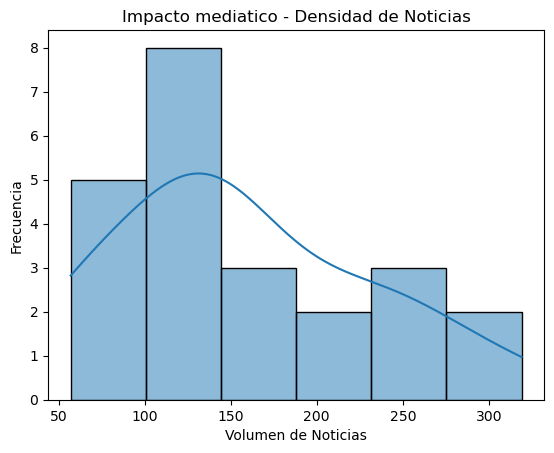

In [591]:
# Histograma de curva de densidad de noticias
histo(companies_new_vol,'Volumen de Noticias','Frecuencia','Impacto mediatico - Densidad de Noticias')

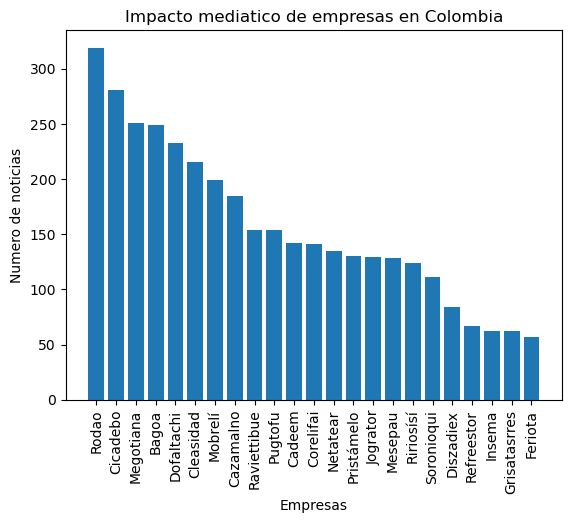

In [592]:
# Grafico de barras del volumen de noticias por empresa
bar(companies_new_vol.index,companies_new_vol.values,'Empresas','Numero de noticias','Impacto mediatico de empresas en Colombia',90)

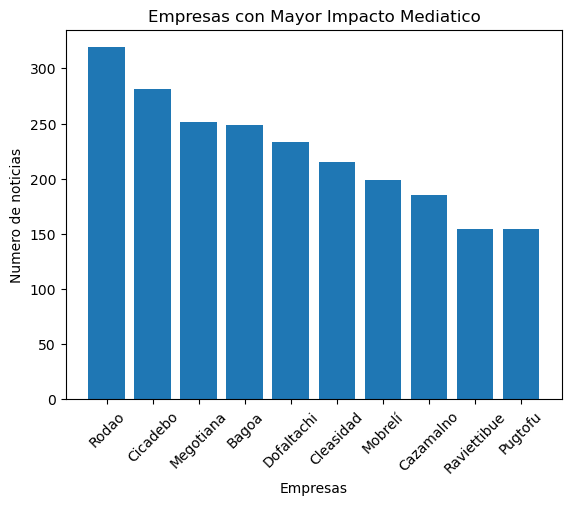

In [593]:
# Grafico de barras de las 10 empresas con mas volumen de noticias    

# Estas serian las empresas que podrian estar mas interesadas en contratar el servicio de consultoria

bar(companies_new_vol.index[:10],companies_new_vol.values[:10],'Empresas','Numero de noticias','Empresas con Mayor Impacto Mediatico',45)

In [594]:
print(companies_new_vol.index[:10])

Index(['Rodao', 'Cicadebo', 'Megotiana', 'Bagoa', 'Dofaltachi', 'Cleasidad',
       'Mobrelí', 'Cazamalno', 'Raviettibue', 'Pugtofu'],
      dtype='object', name='Empresa')


# **Segundo punto** 

2. ¿Cómo identificaría las empresas que más innovación tecnológica presentan? Desarrolle conceptualmente su respuesta.

In [600]:
# creamos una nueva columna llamada "Tech" para validar si la noticia esta relacionada con tecnologia  (True or False)

# True: existe la mencion de la palabra tecnologia en algunas de las siguientes columnas 'Resumen', 'Titulo', 'Contenido', 'Tags'

# False: No existe la mencion de la palabra tecnologia en ninguna de las 4 columnas 'Resumen', 'Titulo', 'Contenido', 'Tags'


df['Tech'] = df[['Resumen', 'Titulo', 'Contenido', 'Tags']].apply(lambda x: x.str.contains('tecnología').any(), axis=1)

# Mostrar volumen de noticias relacionadas con tecnologia por empresa

df_tech = df.groupby('Empresa')['Tech'].sum().sort_values(ascending=False)
df_tech

Empresa
Cicadebo        31
Megotiana       29
Mobrelí         21
Cadeem          21
Corelifai       20
Refreestor      20
Pristámelo      20
Pugtofu         18
Bagoa           17
Mesepau         17
Rodao           17
Cazamalno       16
Netatear        14
Jogrator        13
Cleasidad       13
Diszadiex       10
Raviettibue      9
Feriota          6
Ririosísí        6
Dofaltachi       5
Grisatasrres     4
Insema           3
Soronioqui       3
Name: Tech, dtype: int64

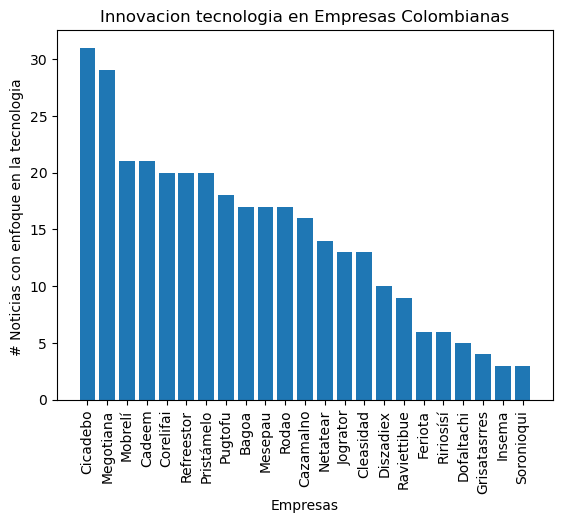

In [601]:
# numero de noticias relacionadas con tecnologia por cada empresa - grafico de barras
bar(df_tech.index,df_tech.values,'Empresas','# Noticias con enfoque en la tecnologia ','Innovacion tecnologia en Empresas Colombianas',90)

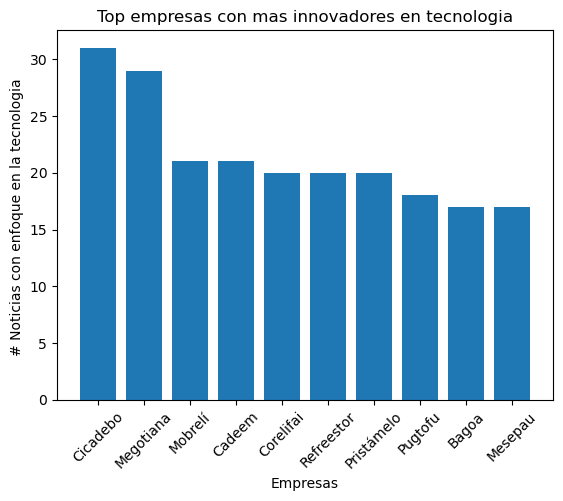

In [605]:
# Top 10 empresas mas innovadores en tecnologia
bar(df_tech.index[:10],df_tech.values[:10],'Empresas','# Noticias con enfoque en la tecnologia ','Top empresas con mas innovadores en tecnologia',45)

# **Tercer punto**

1. Luego de participar en el foro; la empresa Cicadebo se ha interesado en contratar una consultoría con Accenture con el fin de 
rehacer su historia reciente en términos de impacto mediático. Teniendo en mente el objetivo, desarrollar a profundidad los 
siguientes ejercicios:

    • Realizar un gráfico que nos permita entender la distribución temporal de las noticias para la empresa Cicadebo. ¿Qué podemos inferir del comportamiento de los datos?

In [479]:
# filtrar la base de datos por las noticias de Cicadebo unicamente

df_cicadebo = df[df['Empresa'] == 'Cicadebo']

In [480]:
#Columna de fecha de publicacion

fechas = df_cicadebo['Fecha Publicacion'].reset_index(drop=True)

In [481]:
# convertir las fechas en un mismo formato  aa-mm-dd

df_fechas = pd.to_datetime(fechas,format='mixed')
df_fechas


0     2023-03-30
1     2023-03-30
2     2023-03-30
3     2023-03-30
4     2023-03-30
         ...    
276   2023-05-03
277   2023-05-03
278   2023-05-03
279   2023-05-03
280   2023-05-03
Name: Fecha Publicacion, Length: 281, dtype: datetime64[ns]

In [482]:
# Numero de noticias de Cicadebo por mes 

noticia_mes = df_fechas.dt.month.value_counts().sort_index()
noticia_mes

Fecha Publicacion
2.0      10
3.0      82
4.0     143
5.0      30
6.0       1
7.0       1
8.0       1
10.0      1
11.0      3
12.0      7
Name: count, dtype: int64

In [483]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
noticia_mes.index = meses[:noticia_mes.shape[0]]

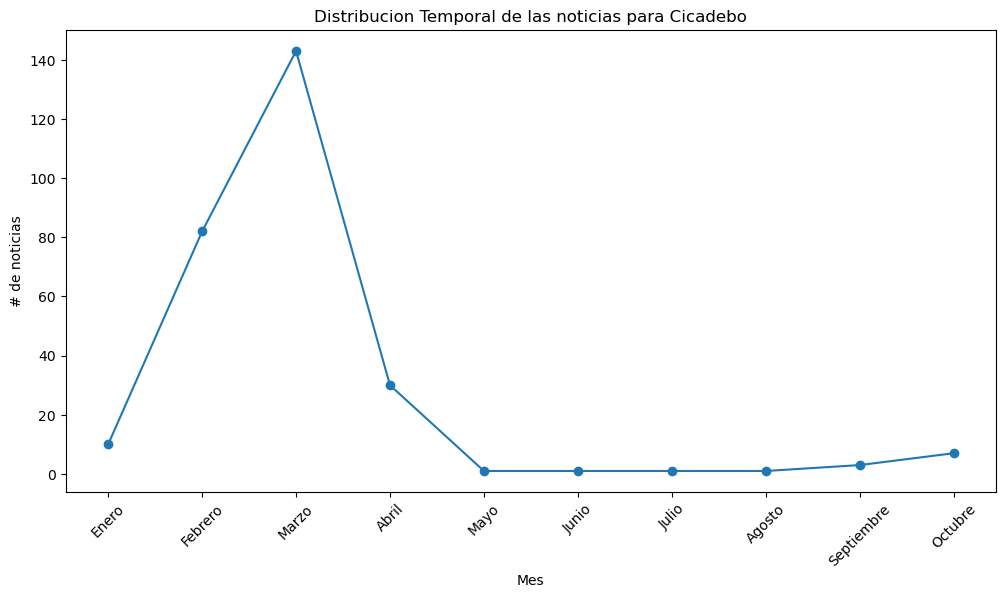

In [484]:


plt.figure(figsize=(12,6))
plt.plot(noticia_mes.index, noticia_mes.values, marker='o', linestyle='-')
plt.xlabel('Mes')
plt.ylabel('# de noticias')
plt.title('Distribucion Temporal de las noticias para Cicadebo')
plt.xticks(rotation=45)
plt.show()

• ¿Qué temáticas podemos encontrar entre febrero y mayo de 2023? Cite al menos dos formas de desarrollar este punto (aparte 
de la lectura manual). 

In [638]:
# Metodo 1 


df_cicadebo = df[df['Empresa'] == 'Cicadebo']


df_cicadebo['Fecha Publicacion'] = pd.to_datetime(df_cicadebo['Fecha Publicacion'],format='mixed')

# definir el rango de las noticias de Cicadebo entre Febrero y Mayo de 2023

fecha_inicio = pd.to_datetime('2023-02-01')
fecha_fin = pd.to_datetime('2023-05-31')

# Filtrar el Dataset con las noticias que este entre Febrero y Mayo de 2023
df_febrero_mayo = df_cicadebo[(df_cicadebo['Fecha Publicacion'] >= fecha_inicio) & (df_cicadebo['Fecha Publicacion'] <= fecha_fin)]

#Conteo de temas entre el mes de Febrero y Mayo de 2023
temas = df_febrero_mayo['Tema'].str.split(',').explode().str.strip().value_counts()

print("Temas de Cicadebo en sus noticias entre Febrero y Mayo de 2023: ")
print(temas)



Temas de Cicadebo en sus noticias entre Febrero y Mayo de 2023: 
Tema
EMPRESAS                     59
FINANZAS                     26
ENERGÍA                      24
ECONOMÍA                     22
GOBIERNO                     14
Bvc                          12
SECTORES                      8
INFRAESTRUCTURA               6
Nación                        6
SANTANDER                     5
EDITORIAL                     5
Cicadebo                      4
OTRAS CIUDADES                4
BOLSAS                        4
COLOMBIA                      4
Empresas                      3
INTERNACIONAL                 3
POLÍTICA                      3
SECTOR FINANCIERO             3
COLUMNISTAS                   3
Bolsa                         2
EDITORIALES                   2
CARICATURAS                   2
OPINIÓN                       2
NOVEDADES TECNOLOGÍA          1
Industria Petrolera           1
Inversionistas                1
Política                      1
CAJA FUERTE                   1
LA

C:\Users\hpalm\AppData\Local\Temp\ipykernel_18296\684382934.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cicadebo['Fecha Publicacion'] = pd.to_datetime(df_cicadebo['Fecha Publicacion'],format='mixed')


¿De qué hablan mayoritariamente los artículos? Justifique su respuesta con un gráfico

In [639]:


# Combinar los temas con menor frecuencia en un solo tema global "Otros Temas"
combined_count = sum(count for label, count in temas.items() if label >= 'INFRAESTRUCTURA')


# seleccionar los temas con menor frecuencia para eliminarlos del dicionario original 
keys_to_remove = list(temas.keys())[7:]

for key in keys_to_remove:
    del temas[key]

print(temas)

Tema
EMPRESAS    59
FINANZAS    26
ENERGÍA     24
ECONOMÍA    22
GOBIERNO    14
Bvc         12
SECTORES     8
Name: count, dtype: int64


In [640]:
# Agregamos el conteo de los temas con menor frecuencia 

temas['Otros Temas'] = combined_count
print(temas)

Tema
EMPRESAS       59
FINANZAS       26
ENERGÍA        24
ECONOMÍA       22
GOBIERNO       14
Bvc            12
SECTORES        8
Otros Temas    57
Name: count, dtype: int64


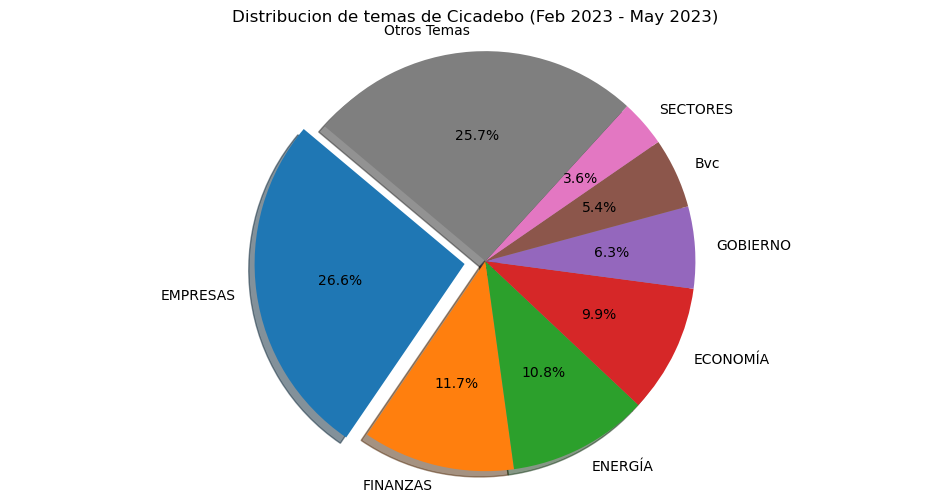

In [641]:
# Mostrar Pie Chart para reflejar el porcentaje de los temas en relacion al total de temas durante el periodo (Feb 2023 - May 2023)

labels, recuento = zip(*temas.items())
pie(recuento,labels,'Distribucion de temas de Cicadebo (Feb 2023 - May 2023)',[0.1,0,0,0,0,0,0,0])

# Estos son los temas mas hablados en las noticias realizadas ha Cicadebo [Empresas, Finanzas, Energia, Economia, Gobierno, Bvc y Sectores] 
# Estas 8 representar el 75% de las noticias publicadas entre Feb - May 2023

- La columna fuente contiene el nombre del diario que posteó la noticia ¿qué se puede concluir de la distribución de noticias por periódico? 
Presente un gráfico que ilustre el punto.

In [642]:
# Conteo de las fuentes que publicaron las noticias de Cicadebo entre Feb - May 2023

Fuente = df_febrero_mayo['Fuente'].value_counts()
Fuente

Fuente
Noarema      99
Pádinoqui    62
Rívenmosa    40
Pensetar     34
Petefus      24
Acarcesa      4
Name: count, dtype: int64

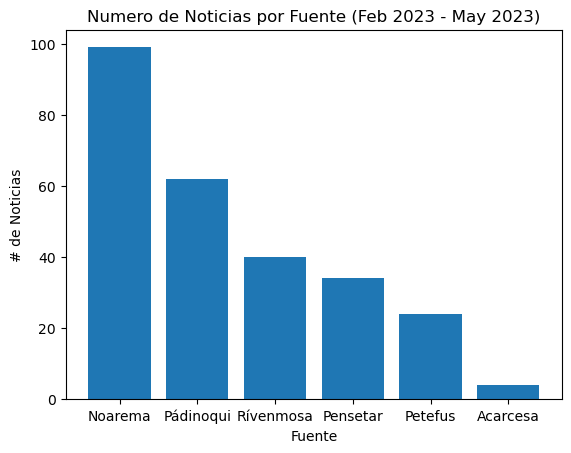

In [643]:
# Graficamos
bar(Fuente.index,Fuente.values,'Fuente','# de Noticias','Numero de Noticias por Fuente (Feb 2023 - May 2023)')

In [644]:
# Porcentuamos estos datos de las fuentes para observar cuales fuentes publican con mas frecuencia noticias sobre Cicadebo
porcentaje_noticias = (Fuente/Fuente.sum()) * 100

# ordenar fuentes 
porcentaje_noticias = porcentaje_noticias.sort_values(ascending=False)

# Mostrar las fuentes que dominan el mayor porcentaje de noticias 
fuentes_domina_mayor = porcentaje_noticias.head(10)  # Muestrar las 10 fuentes con mayor porcentaje
print(fuentes_domina_mayor)


Fuente
Noarema      37.642586
Pádinoqui    23.574144
Rívenmosa    15.209125
Pensetar     12.927757
Petefus       9.125475
Acarcesa      1.520913
Name: count, dtype: float64


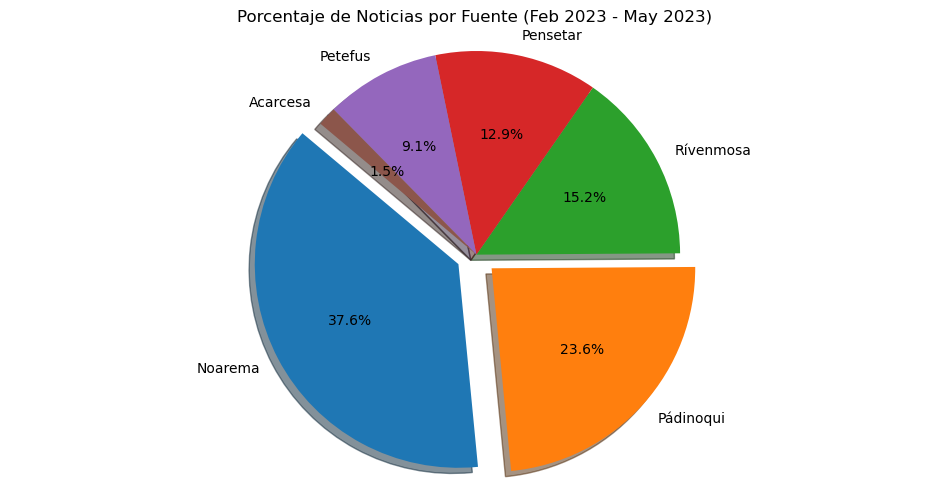

In [645]:
# Graficamos los porcentajes para sacar concluciones finales

pie(porcentaje_noticias,porcentaje_noticias.index,'Porcentaje de Noticias por Fuente (Feb 2023 - May 2023)',[0.1,0.1,0,0,0,0])

# Se puede concluir que Noerema y Padinoqui son las fuentes que mas publicaron noticias sobre Cicadebo en el entre Feb - May 2023